In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

sns.set(style="whitegrid")

current_dir = Path(os.getcwd())
if current_dir.name == "modeling" and current_dir.parent.name == "src":
    PROJECT_ROOT = current_dir.parent.parent
else:
    PROJECT_ROOT = current_dir
    while PROJECT_ROOT != PROJECT_ROOT.parent:
        if (PROJECT_ROOT / "src" / "modeling").exists() or (PROJECT_ROOT / "data").exists():
            break
        PROJECT_ROOT = PROJECT_ROOT.parent

MASTER = PROJECT_ROOT / "data" / "final" / "master_dataset_with_tankfullness.csv"
SAVE_DIR = PROJECT_ROOT / "reports" / "eda"
SAVE_DIR.mkdir(parents=True, exist_ok=True)


def savefig(name, close=True):
    plt.savefig(SAVE_DIR / f"{name}.png", dpi=300, bbox_inches="tight")
    if close:
        plt.close()


In [13]:
df = pd.read_csv(MASTER)
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")

df.head()


,date,Houston,Singapore,Rotterdam,Fujairah,RasTanura,Antwerp,Qingdao,Dalian,CorpusChristi,...,Ulsan,Mumbai,demand_score,close_price,wti_price,gasoline_price,diesel_price,tank_inventory_score_old,tank_fullness_global_pct,tank_inventory_score
0,2019-01-01,34.0,153.0,84.0,52.0,59.0,33.0,46.0,41.0,13.0,...,30.0,23.0,0.019977,28.809999,46.31,1.2940,1.7050,51.79,NaN,51.79
1,2019-01-02,33.0,143.0,83.0,54.0,42.0,33.0,41.0,31.0,13.0,...,29.0,26.0,0.019977,28.809999,46.31,1.3440,1.6560,52.12,NaN,52.12
2,2019-01-03,34.0,148.0,81.0,59.0,55.0,33.0,53.0,39.0,13.0,...,33.0,22.0,0.019977,28.809999,46.92,1.3590,1.6905,52.23,NaN,52.23
3,2019-01-04,34.0,156.0,100.0,57.0,43.0,31.0,53.0,31.0,14.0,...,26.0,22.0,0.019977,28.809999,47.76,1.3615,1.7345,49.52,NaN,49.52
4,2019-01-05,37.0,138.0,73.0,45.0,44.0,28.0,39.0,37.0,12.0,...,32.0,23.0,0.019977,28.809999,47.76,1.4080,1.6910,50.08,NaN,50.08


In [14]:
print(df.info())
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2510 entries, 0 to 2509
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      2510 non-null   datetime64[ns]
 1   Houston                   2510 non-null   float64       
 2   Singapore                 2510 non-null   float64       
 3   Rotterdam                 2510 non-null   float64       
 4   Fujairah                  2510 non-null   float64       
 5   RasTanura                 2510 non-null   float64       
 6   Antwerp                   2510 non-null   float64       
 7   Qingdao                   2510 non-null   float64       
 8   Dalian                    2510 non-null   float64       
 9   CorpusChristi             2510 non-null   float64       
 10  PortArthur                2510 non-null   float64       
 11  Fawley_UK                 2510 non-null   float64       
 12  MinaAlAhmadi        

,date,Houston,Singapore,Rotterdam,Fujairah,RasTanura,Antwerp,Qingdao,Dalian,CorpusChristi,...,Ulsan,Mumbai,demand_score,close_price,wti_price,gasoline_price,diesel_price,tank_inventory_score_old,tank_fullness_global_pct,tank_inventory_score
count,2510,2510.000000,2510.000000,2510.000000,2510.000000,2510.000000,2510.000000,2510.000000,2510.000000,2510.000000,...,2510.000000,2510.000000,2510.000000,2510.000000,2510.000000,2510.000000,2510.000000,2510.000000,12.000000,2510.00000
mean,2022-06-08 12:00:00,29.746215,120.678088,80.049402,50.262550,45.367729,28.172510,45.284064,35.158167,11.946215,...,28.386056,22.203187,-0.014216,56.138275,68.614175,2.121200,2.318760,49.683701,38.177267,49.64182
min,2019-01-01 00:00:00,6.000000,21.000000,26.000000,13.000000,10.000000,10.000000,14.000000,13.000000,3.000000,...,9.000000,9.000000,-0.434213,28.809999,-36.980000,0.364000,0.571000,29.850000,35.651860,29.85000
25%,2020-09-19 06:00:00,25.000000,99.000000,67.000000,42.000000,38.000000,23.000000,38.000000,29.000000,10.000000,...,24.000000,19.000000,-0.044622,28.809999,58.190000,1.745000,1.888625,43.810000,37.481860,43.73000
50%,2022-06-08 12:00:00,29.000000,119.000000,79.000000,50.000000,45.000000,28.000000,45.000000,34.000000,12.000000,...,28.000000,22.000000,0.019977,64.980000,69.780000,2.114750,2.239000,48.490000,37.814419,48.47000
75%,2024-02-25 18:00:00,34.000000,141.000000,92.000000,57.000000,52.000000,32.000000,52.000000,40.000000,14.000000,...,33.000000,25.000000,0.086733,73.449997,79.557500,2.468000,2.645625,53.517500,39.299186,53.51000
max,2025-11-14 00:00:00,59.000000,238.000000,164.000000,127.000000,90.000000,52.000000,98.000000,69.000000,25.000000,...,57.000000,40.000000,0.289842,91.989998,123.640000,4.426500,5.246000,92.350000,40.853488,92.35000
std,NaN,6.485454,31.635415,19.651770,11.525458,10.239569,6.400052,11.017079,8.540906,2.866064,...,6.530882,4.897611,0.172020,20.106958,18.262566,0.629274,0.766053,8.875024,1.485297,8.90002


In [15]:
ais_cols = [
    "Houston","Singapore","Rotterdam","Fujairah","RasTanura",
    "Antwerp","Qingdao","Dalian","CorpusChristi","PortArthur",
    "Fawley_UK","MinaAlAhmadi","Yokohama","Ulsan","Mumbai"
]

df["global_tanker_flow"] = df[ais_cols].sum(axis=1)
df[["date","global_tanker_flow"]].head()


,date,global_tanker_flow
0,2019-01-01,638.0
1,2019-01-02,595.0
2,2019-01-03,634.0
3,2019-01-04,631.0
4,2019-01-05,579.0


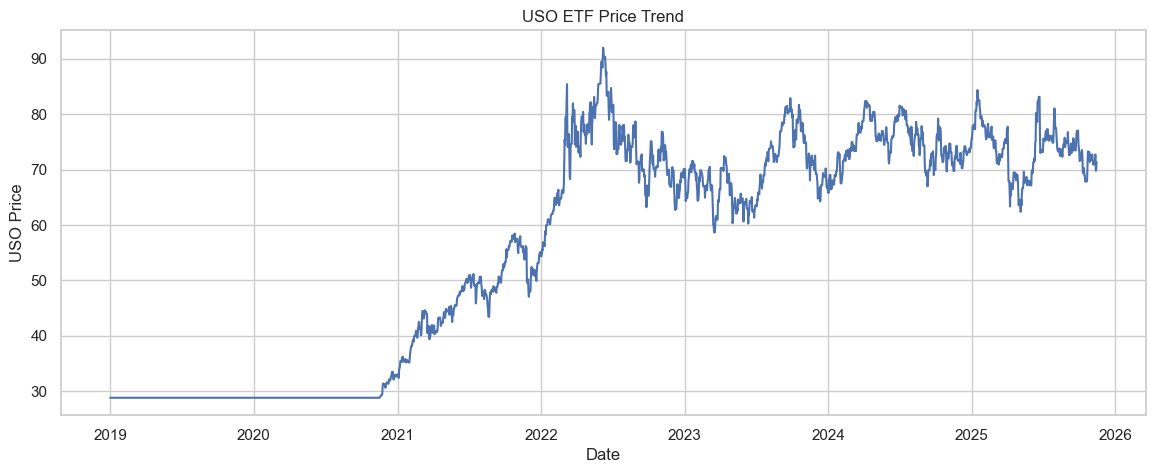

In [20]:
plt.figure(figsize=(14,5))
plt.plot(df["date"], df["close_price"])
plt.title("USO ETF Price Trend")
plt.xlabel("Date")
plt.ylabel("USO Price")
plt.show()
savefig("uso_price_trend")


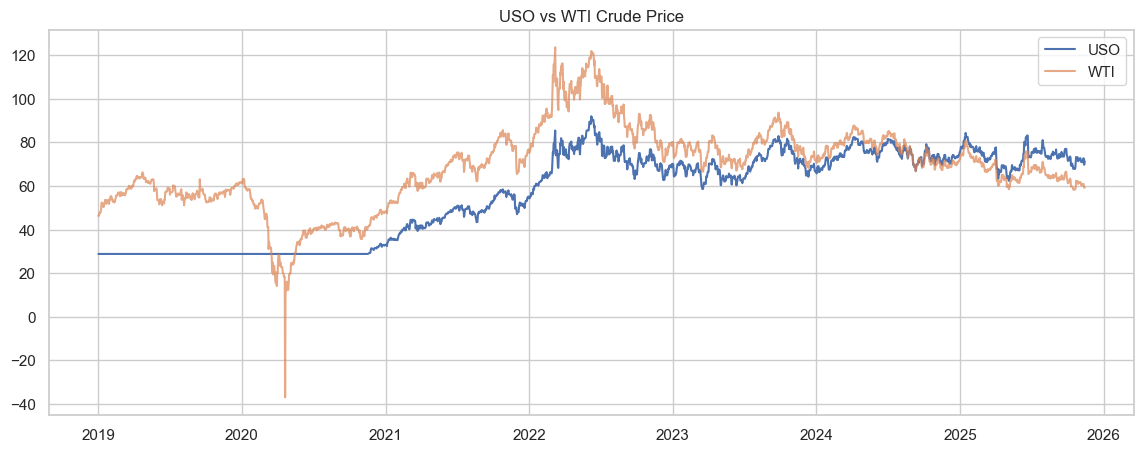

In [21]:
plt.figure(figsize=(14,5))
plt.plot(df["date"], df["close_price"], label="USO")
plt.plot(df["date"], df["wti_price"], label="WTI", alpha=0.7)
plt.legend()
plt.title("USO vs WTI Crude Price")
plt.show()
savefig("uso_vs_wti")


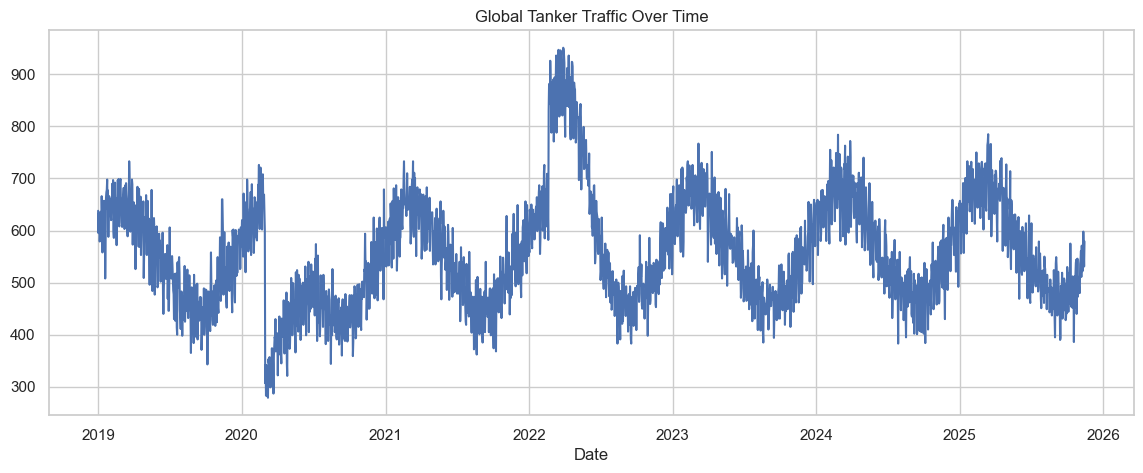

In [24]:
plt.figure(figsize=(14,5))
plt.plot(df["date"], df["global_tanker_flow"])
plt.title("Global Tanker Traffic Over Time")
plt.xlabel("Date")
plt.show()
savefig("global_tanker_flow")


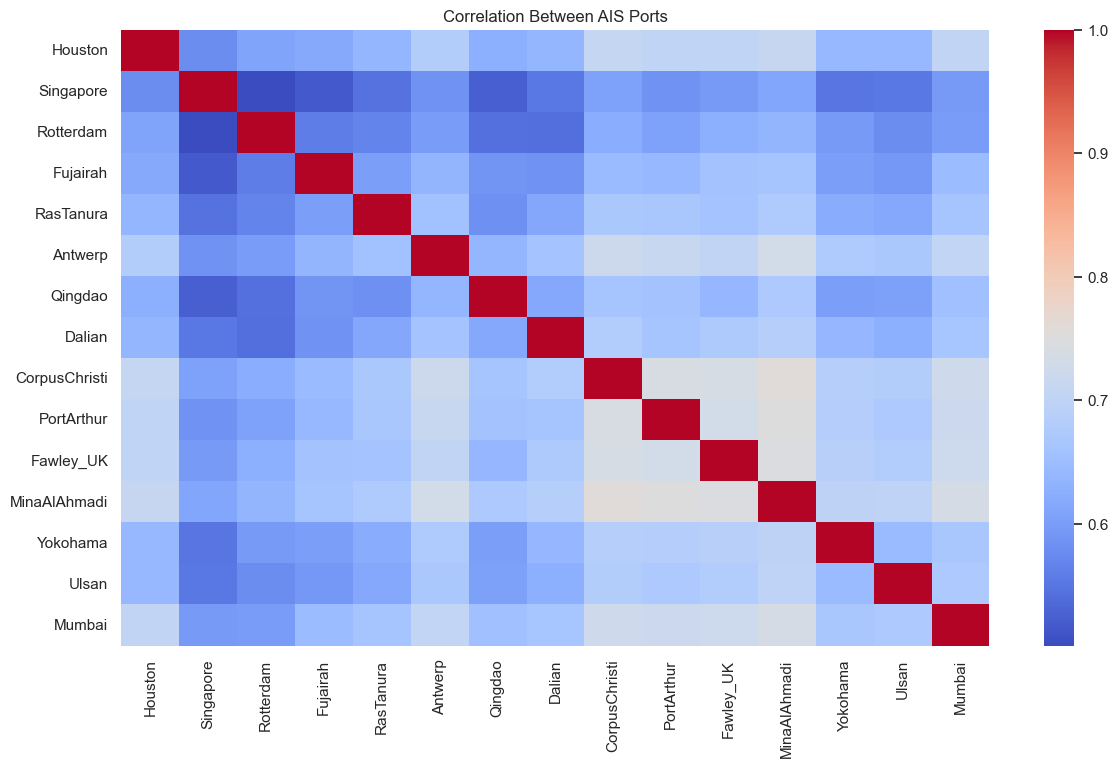

In [26]:
plt.figure(figsize=(14,8))
sns.heatmap(df[ais_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Between AIS Ports")
plt.show()
savefig("ais_correlation_heatmap")


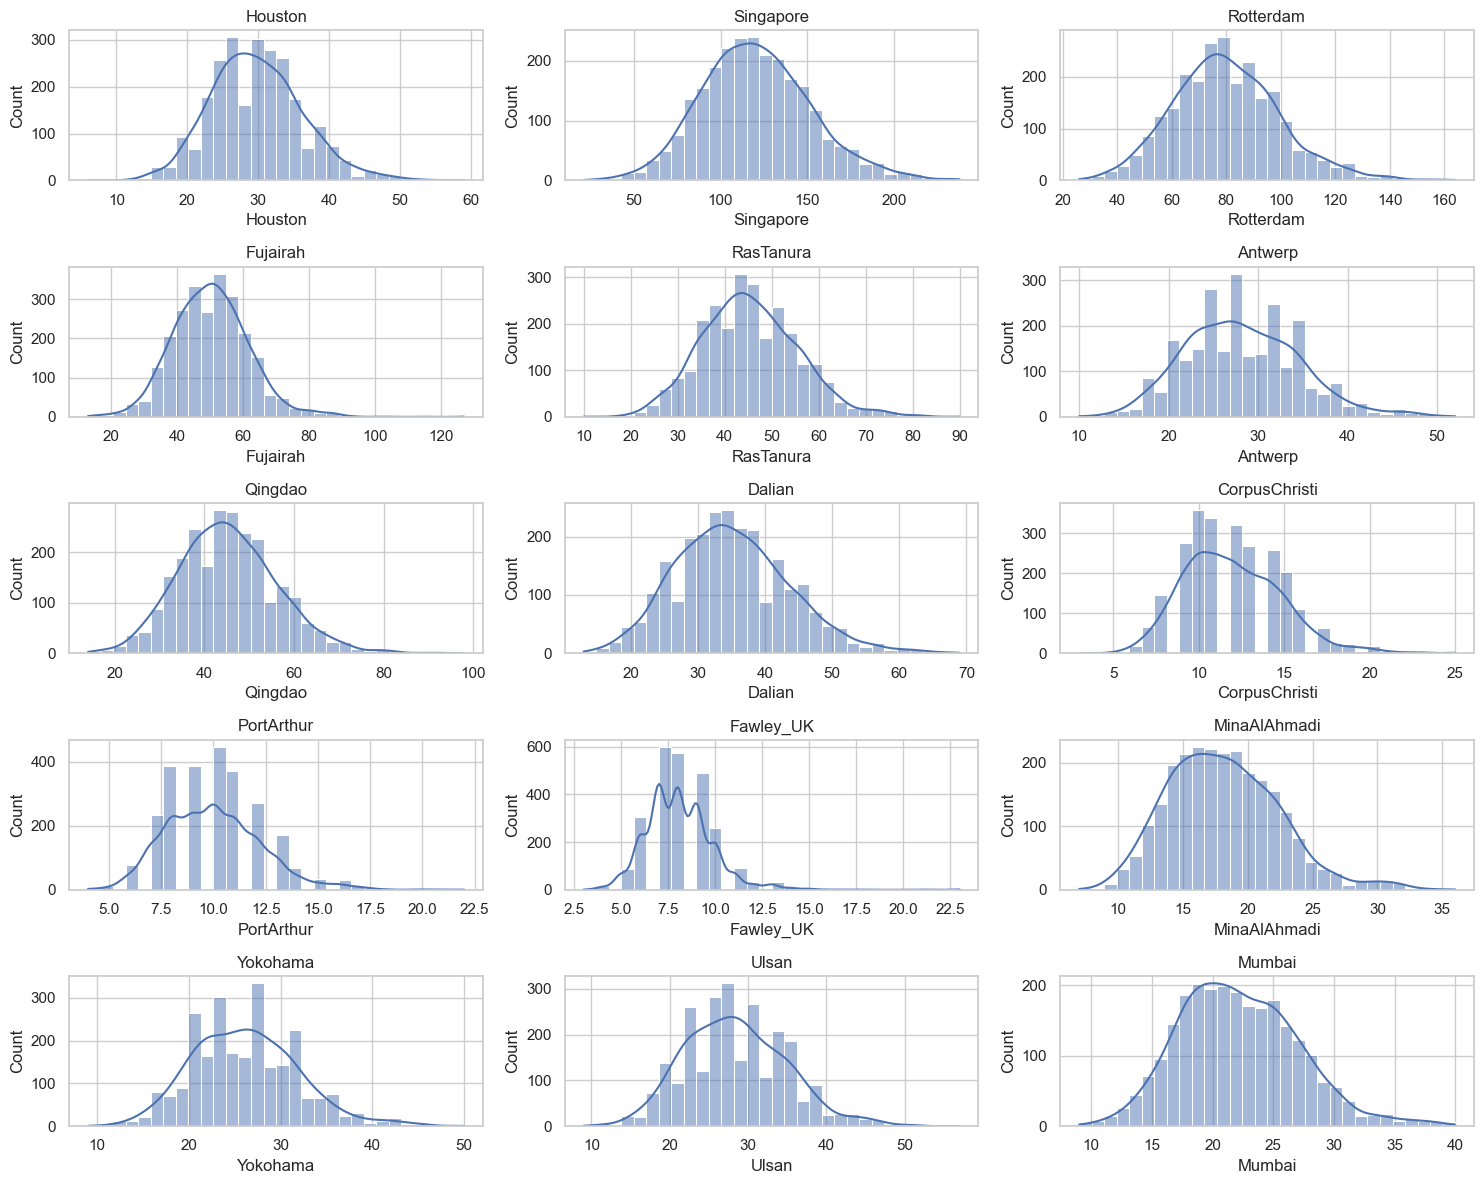

In [32]:
plt.figure(figsize=(15,12))
for i, col in enumerate(ais_cols,1):
    plt.subplot(5,3,i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()
savefig("port_distributions")


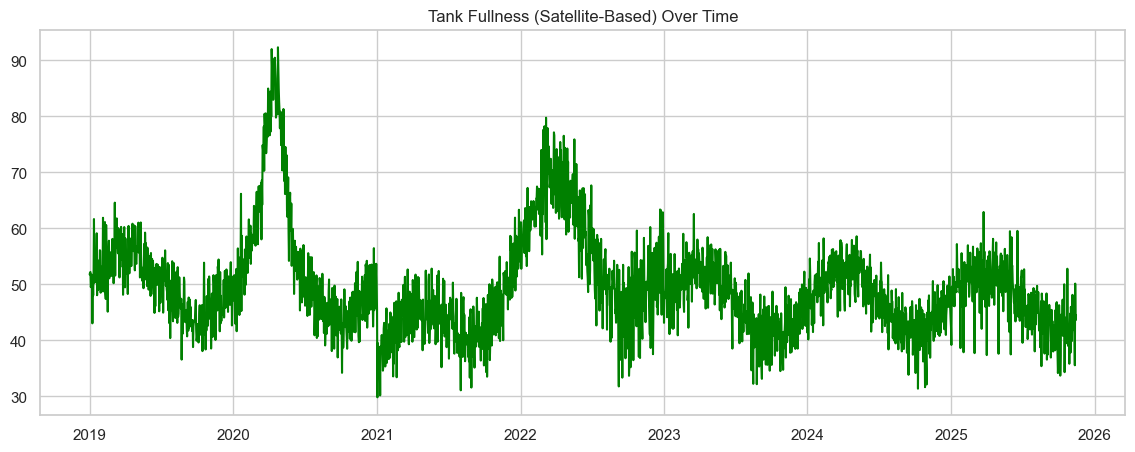

In [34]:
plt.figure(figsize=(14,5))
plt.plot(df["date"], df["tank_inventory_score"], color="green")
plt.title("Tank Fullness (Satellite-Based) Over Time")
plt.show()
savefig("tank_fullness_trend")


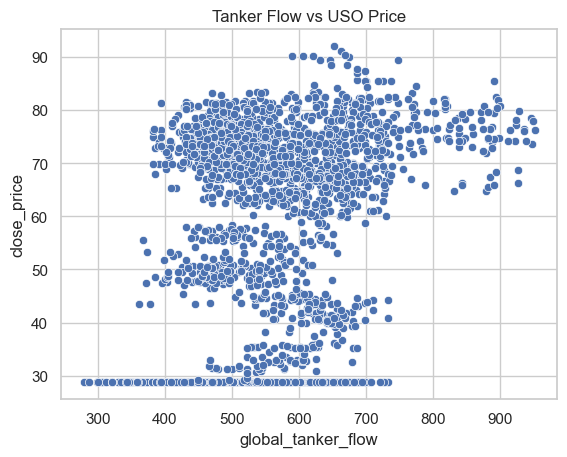

In [35]:
sns.scatterplot(x=df["global_tanker_flow"], y=df["close_price"])
plt.title("Tanker Flow vs USO Price")
plt.show()
savefig("flow_vs_uso")


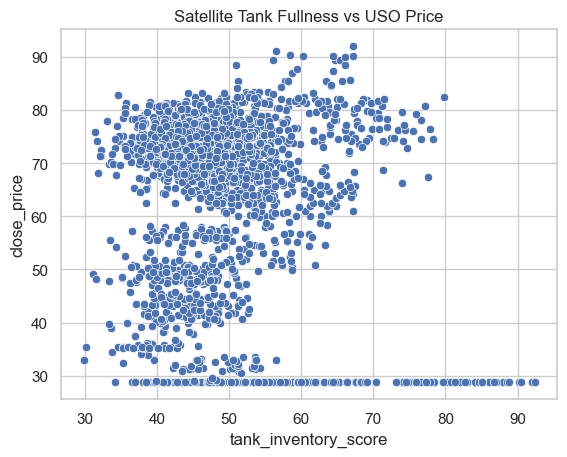

In [36]:
sns.scatterplot(x=df["tank_inventory_score"], y=df["close_price"])
plt.title("Satellite Tank Fullness vs USO Price")
plt.show()
savefig("fullness_vs_uso")


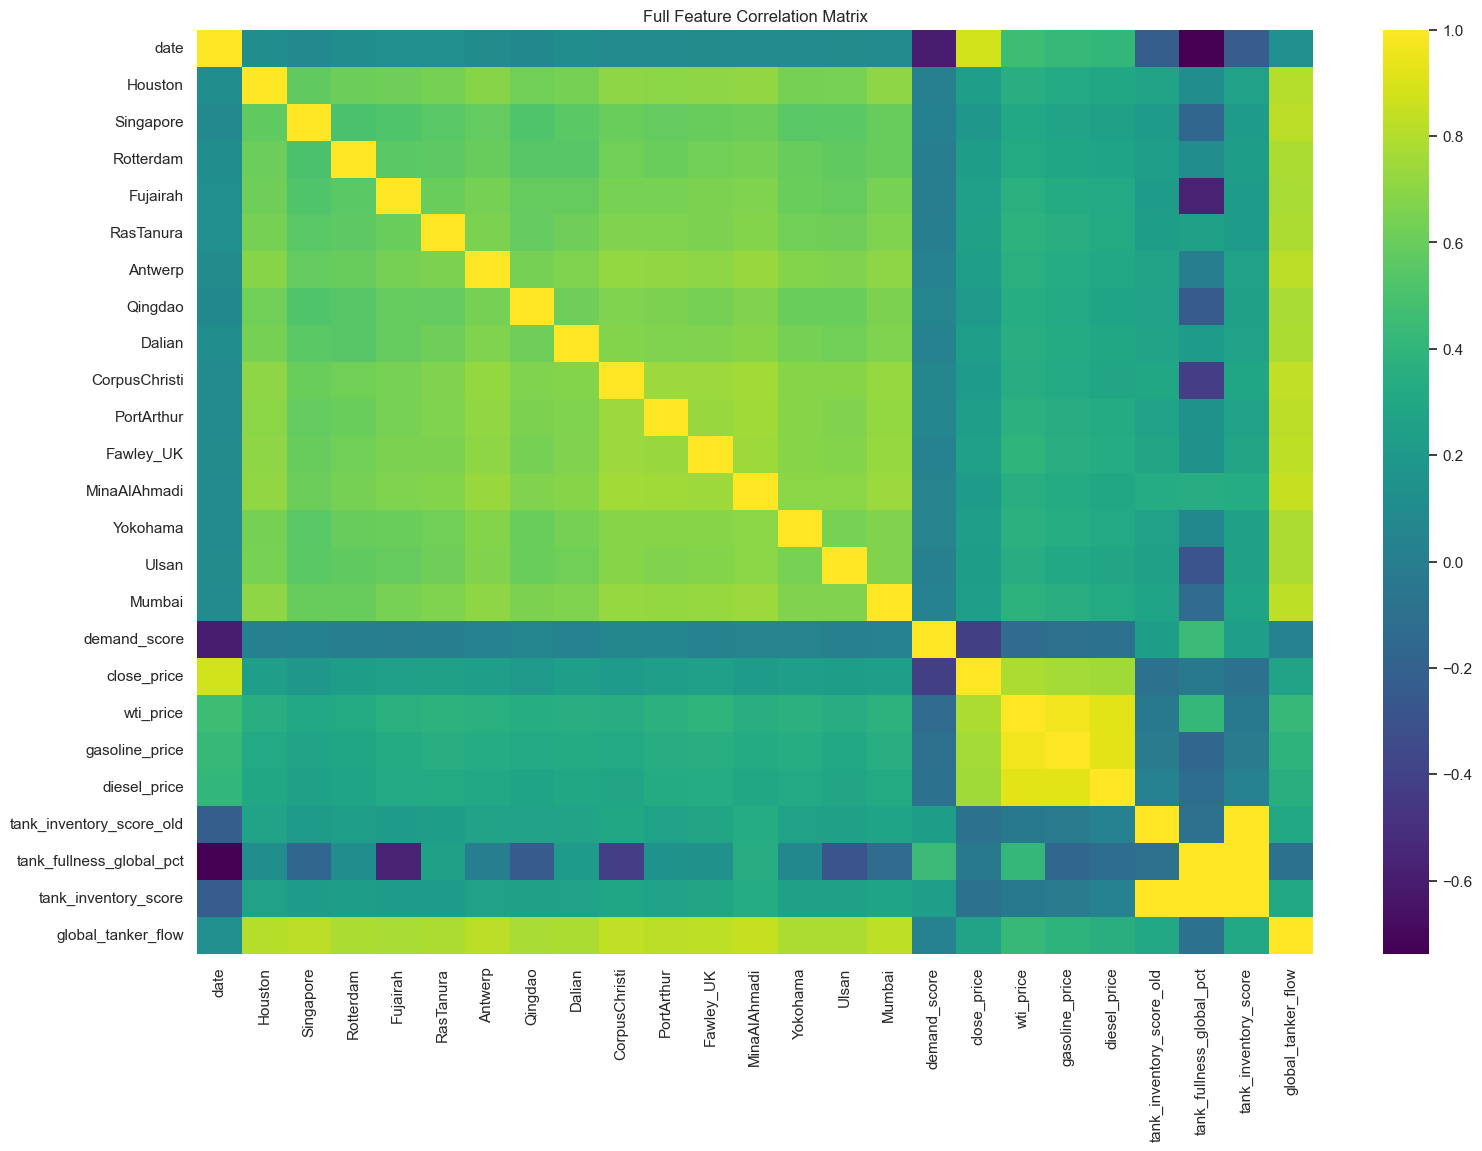

In [37]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), cmap="viridis")
plt.title("Full Feature Correlation Matrix")
plt.show()
savefig("full_correlation_heatmap")



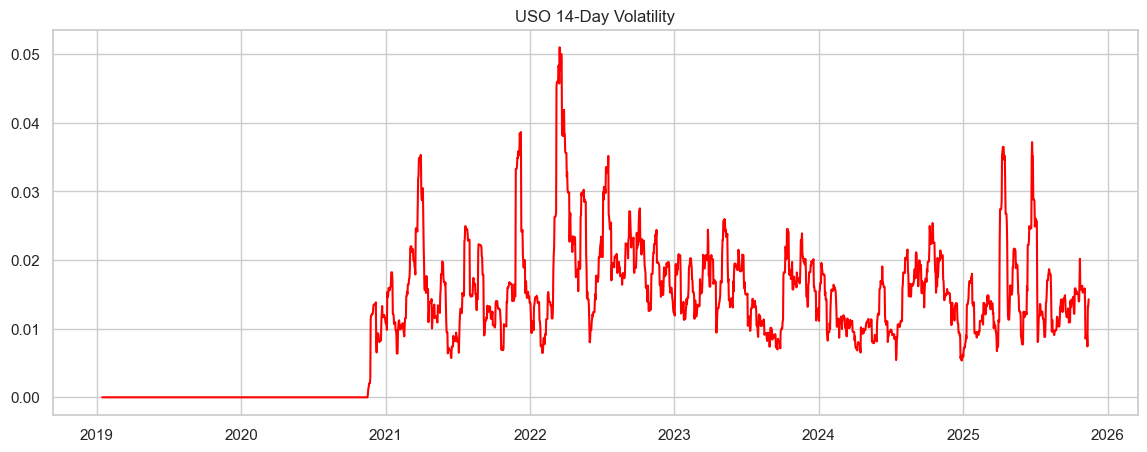

In [38]:
df["uso_volatility"] = df["close_price"].pct_change().rolling(14).std()

plt.figure(figsize=(14,5))
plt.plot(df["date"], df["uso_volatility"], color="red")
plt.title("USO 14-Day Volatility")
plt.show()
savefig("uso_volatility")



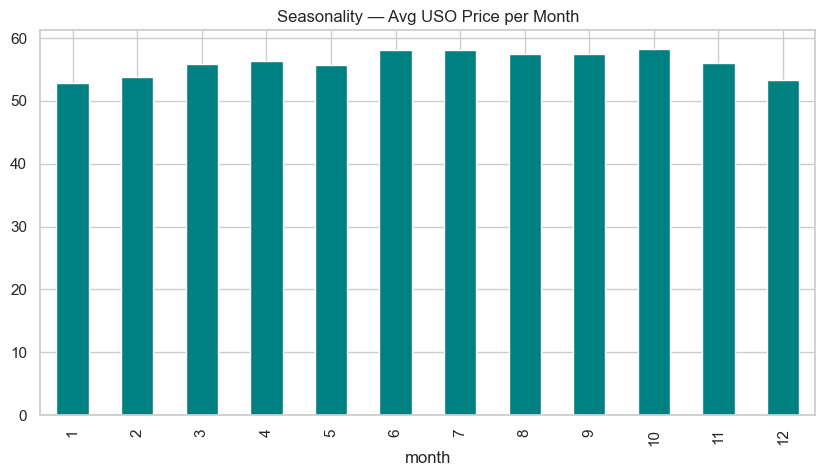

In [39]:
df["month"] = df["date"].dt.month
monthly_mean = df.groupby("month")["close_price"].mean()

plt.figure(figsize=(10,5))
monthly_mean.plot(kind="bar", color="teal")
plt.title("Seasonality — Avg USO Price per Month")
plt.show()
savefig("seasonality_monthly_uso")



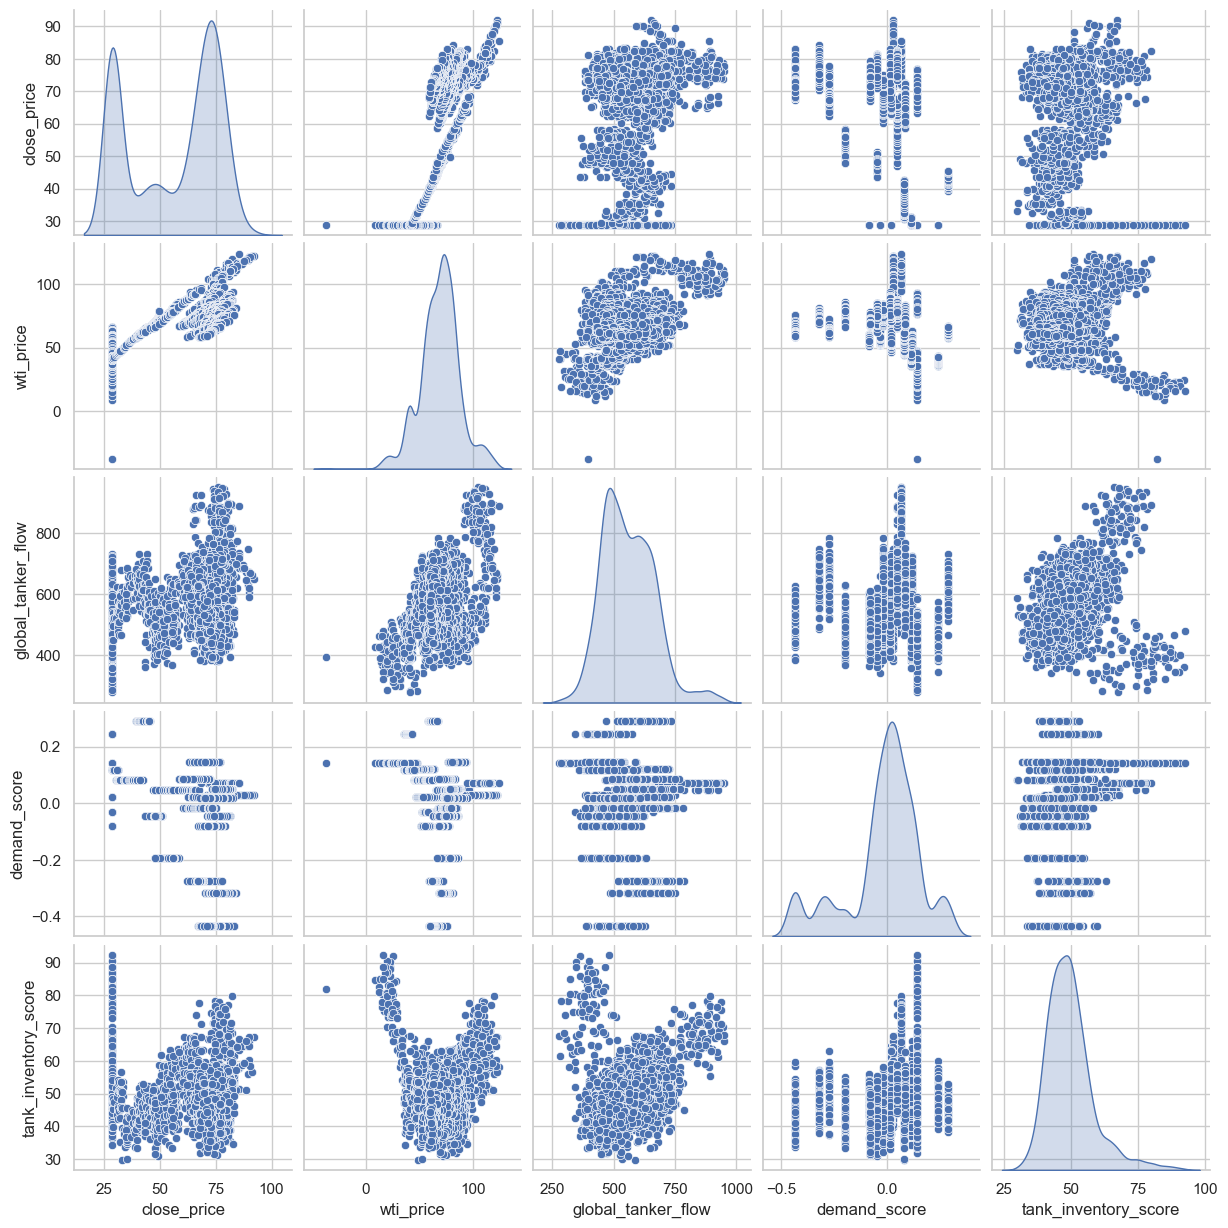

In [40]:
key_vars = [
    "close_price", "wti_price", "global_tanker_flow",
    "demand_score", "tank_inventory_score"
]

sns.pairplot(df[key_vars], diag_kind="kde")
plt.show()
savefig("pairplot_key_vars")



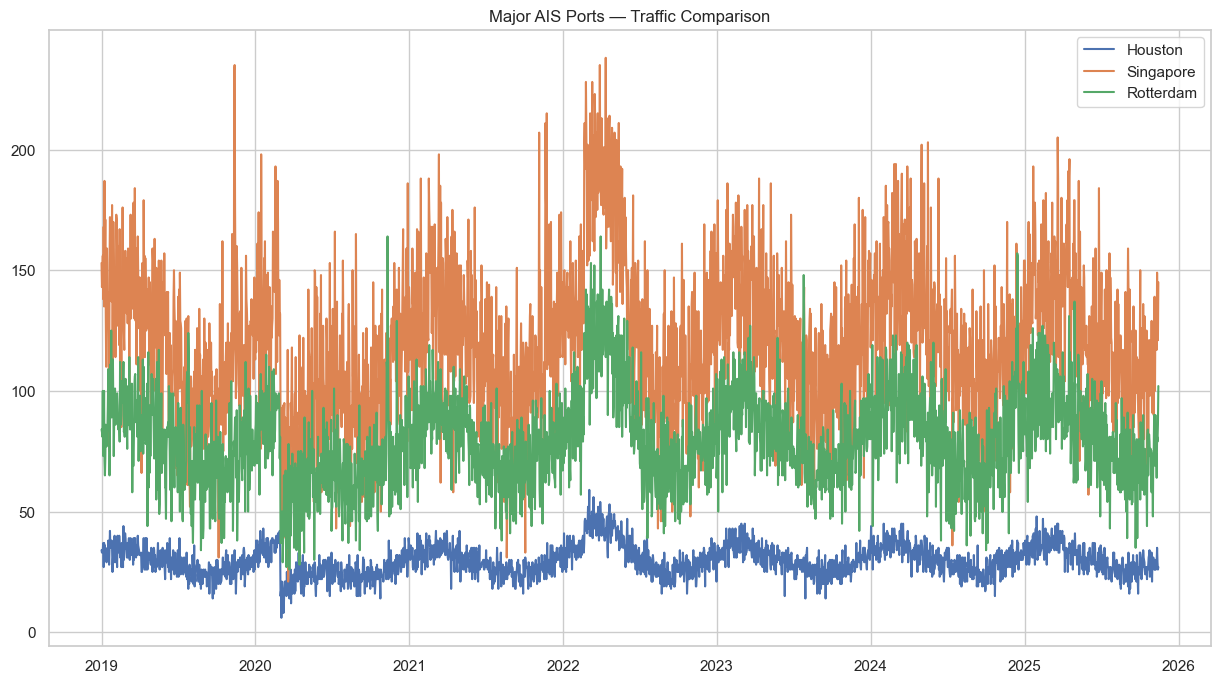

In [41]:
plt.figure(figsize=(15, 8))
for col in ["Houston", "Singapore", "Rotterdam"]:
    plt.plot(df["date"], df[col], label=col)
plt.legend()
plt.title("Major AIS Ports — Traffic Comparison")
plt.show()
savefig("major_port_trend")



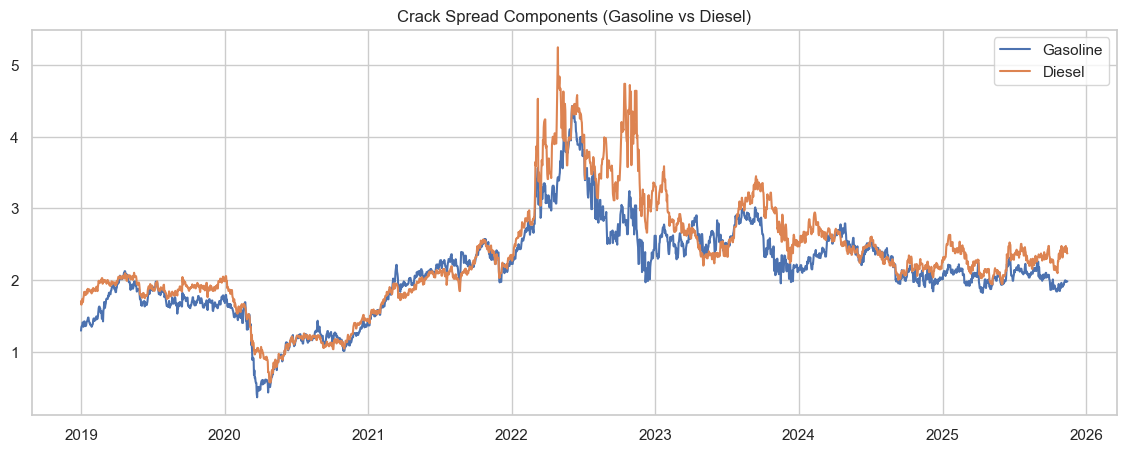

In [43]:
plt.figure(figsize=(14,5))
plt.plot(df["date"], df["gasoline_price"], label="Gasoline")
plt.plot(df["date"], df["diesel_price"], label="Diesel")
plt.legend()
plt.title("Crack Spread Components (Gasoline vs Diesel)")
plt.show()
savefig("crack_spread_components")



C:\Users\akmal\AppData\Local\Temp\ipykernel_28372\770657896.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)
C:\Users\akmal\AppData\Local\Temp\ipykernel_28372\770657896.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)
C:\Users\akmal\AppData\Local\Temp\ipykernel_28372\770657896.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)
C:\Users\akmal\AppData\Local\Temp\ipykernel_28372\770657896.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.k

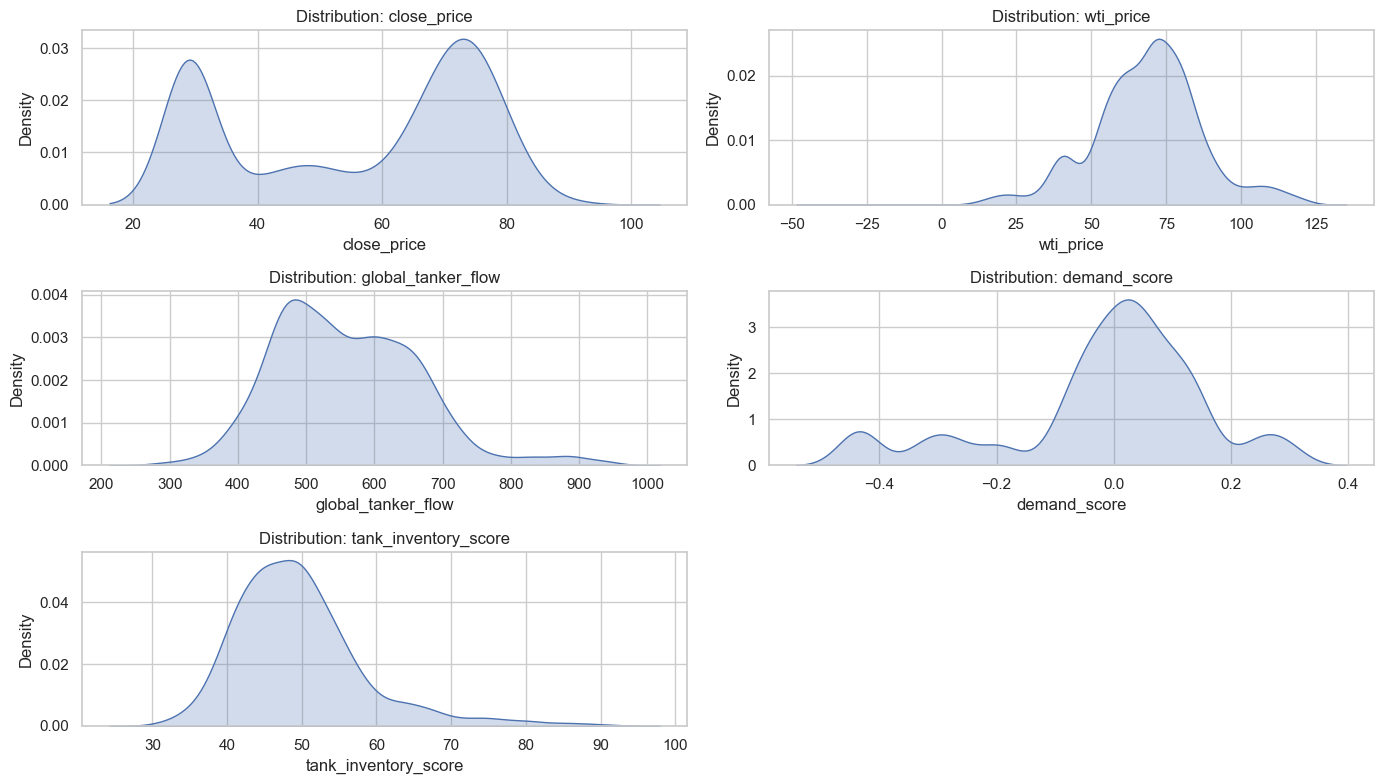

In [44]:
plt.figure(figsize=(14,8))
for idx, col in enumerate(key_vars, 1):
    plt.subplot(3,2,idx)
    sns.kdeplot(df[col], shade=True)
    plt.title(f"Distribution: {col}")
plt.tight_layout()
plt.show()
savefig("kde_distributions")

